In [ ]:
import pandas as pd

In [ ]:
positions = pd.read_csv("/content/positions.csv")
positions.head()

,date_number,product_id,category_id,position
0,0,4450020,4461548,17
1,0,42147334,4461548,4
2,0,81131830,4461548,35
3,0,84035833,4461548,38
4,0,125252584,4461548,39


In [ ]:
product_blocks = pd.read_csv("/content/product_blocks.csv")
product_blocks.head()

,product_id,block_id
0,612967398,0
1,296892108,0
2,139541214,0
3,963923934,0
4,938230141,0


In [ ]:
products = pd.read_csv("/content/products.csv")
products.head()

,product_id,family_id,subfamily_id,price
0,151926,396066037,335531561,25.95
1,213413,552529755,11509337,19.95
2,310130,679611953,533441312,12.95
3,373883,775013441,62518413,17.95
4,455200,998145072,490222156,29.95


In [ ]:
sales = pd.read_csv("/content/sales_stock.csv")
sales.head()

,date_number,product_id,color_id,size_id,sales,stock
0,0,310130,78467031,7026791,1,93
1,0,310130,78467031,8015276,2,62
2,0,310130,78467031,452052101,1,18
3,0,310130,78467031,541898038,2,42
4,0,310130,78467031,558685710,3,113


In [ ]:
all_data = products.merge(sales, how='outer', on='product_id')
all_data.head()

,product_id,family_id,subfamily_id,price,date_number,color_id,size_id,sales,stock
0,151926,396066037,335531561,25.95,59.0,909958217.0,111455099.0,0.0,17.0
1,151926,396066037,335531561,25.95,59.0,909958217.0,242364222.0,3.0,63.0
2,151926,396066037,335531561,25.95,59.0,909958217.0,513017386.0,1.0,33.0
3,151926,396066037,335531561,25.95,59.0,909958217.0,820445075.0,1.0,42.0
4,151926,396066037,335531561,25.95,60.0,909958217.0,54666687.0,2.0,72.0


In [ ]:
clean_data = all_data[['product_id','color_id','size_id','price','sales','stock']]
clean_data.head()

,product_id,color_id,size_id,price,sales,stock
0,151926,909958217.0,111455099.0,25.95,0.0,17.0
1,151926,909958217.0,242364222.0,25.95,3.0,63.0
2,151926,909958217.0,513017386.0,25.95,1.0,33.0
3,151926,909958217.0,820445075.0,25.95,1.0,42.0
4,151926,909958217.0,54666687.0,25.95,2.0,72.0


In [ ]:
data_by_product_id = sales[['product_id','sales','stock']].groupby(by='product_id').sum()
data_by_product_id

,sales,stock
product_id,,
151926,167,7995
213413,757,56646
310130,578,49639
455200,24,2258
571044,591,18868
...,...,...
999772605,183,6337
999794342,28,2502
999816749,496,32997


In [ ]:
products['product_id'].nunique()

15238

In [ ]:
data_by_product_id = data_by_product_id.merge(products[['product_id','price']], on='product_id')
data_by_product_id

,product_id,sales,stock,price
0,151926,167,7995,25.95
1,213413,757,56646,19.95
2,310130,578,49639,12.95
3,455200,24,2258,29.95
4,571044,591,18868,15.95
...,...,...,...,...
9590,999772605,183,6337,15.95
9591,999794342,28,2502,29.95
9592,999816749,496,32997,5.95
9593,999862351,135,11683,25.95


In [ ]:
data_by_product_id['sales%'] = data_by_product_id['sales']/(data_by_product_id['stock'])*100
data_by_product_id

,product_id,sales,stock,price,sales%
0,151926,167,7995,25.95,2.088806
1,213413,757,56646,19.95,1.336370
2,310130,578,49639,12.95,1.164407
3,455200,24,2258,29.95,1.062888
4,571044,591,18868,15.95,3.132287
...,...,...,...,...,...
9590,999772605,183,6337,15.95,2.887802
9591,999794342,28,2502,29.95,1.119105
9592,999816749,496,32997,5.95,1.503167
9593,999862351,135,11683,25.95,1.155525


In [ ]:
data_by_product_id.reset_index(inplace=True)

<Axes: xlabel='index'>

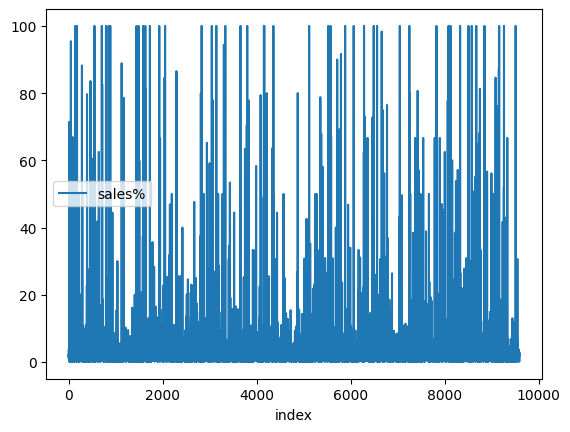

In [ ]:
data_by_product_id.plot('index','sales%',kind='line')

In [ ]:
max(data_by_product_id['sales%'])

50.0

In [ ]:
best_sellers = data_by_product_id.loc[data_by_product_id['sales%']>=50.00,:]
best_sellers

,index,product_id,sales,stock,price,sales%
12,12,1042445,5,7,49.99,71.428571
48,48,5551656,42,44,17.95,95.454545
70,70,7944101,13,23,22.95,56.521739
84,84,9593020,162,242,15.99,66.942149
140,140,15254736,1,1,29.95,100.000000
...,...,...,...,...,...,...
9160,9160,953625487,2,2,19.95,100.000000
9260,9260,964015004,430,825,29.95,52.121212
9263,9263,964340982,3,3,29.95,100.000000
9333,9333,973116514,2,3,22.95,66.666667


In [ ]:
top_sellers = data_by_product_id.loc[data_by_product_id['sales%']>=85.00,:]
top_sellers

,index,product_id,sales,stock,price,sales%
48,48,5551656,42,44,17.95,95.454545
140,140,15254736,1,1,29.95,100.000000
178,178,18904572,16,16,15.99,100.000000
283,283,30446049,15,17,25.95,88.235294
550,550,57726281,9,9,59.95,100.000000
706,706,75650747,7,7,15.95,100.000000
795,795,83898732,39,39,22.95,100.000000
851,851,88418520,4,4,19.95,100.000000
886,886,91970168,1,1,25.95,100.000000
1128,1128,116880754,8,9,19.95,88.888889


In [ ]:
sales['date_number'].value_counts()

78    48326
73    48306
79    48251
74    48160
77    48025
      ...  
6     29577
3     29377
1     28810
2     28723
0     28105
Name: date_number, Length: 92, dtype: int64